<a href="https://colab.research.google.com/github/PunkPotatoQueen/Calculo-Numerico/blob/main/PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O pico da epidemia ocorre no dia 20.
A epidemia não foi controlada durante o período de simulação.


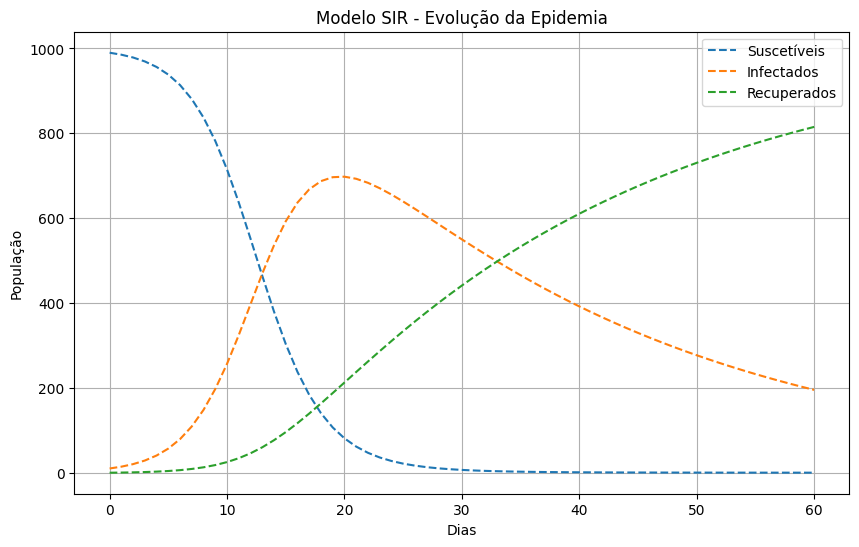

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
beta = 0.4
gamma = 0.035
N = 1000
S0 = 990
I0 = 10
R0 = 0
T = 60

def dSdt(S, I):
    return -beta * S * I / N

def dIdt(S, I):
    return beta * S * I / N - gamma * I

def dRdt(I):
    return gamma * I

def runge_kutta2(S, I, R, h):
    S1 = dSdt(S, I)
    I1 = dIdt(S, I)
    R1 = dRdt(I)

    S2 = dSdt(S + h * S1, I + h * I1)
    I2 = dIdt(S + h * S1, I + h * I1)
    R2 = dRdt(I + h * R1)

    S_new = S + (h / 2) * (S1 + S2)
    I_new = I + (h / 2) * (I1 + I2)
    R_new = R + (h / 2) * (R1 + R2)

    return S_new, I_new, R_new

S_values = [S0]
I_values = [I0]
R_values = [R0]

h = 1

for dia in range(1, T+1):
    S, I, R = runge_kutta2(S_values[-1], I_values[-1], R_values[-1], h)
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

t_values = list(range(T+1))

plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='Suscetíveis', linestyle='dashed')
plt.plot(t_values, I_values, label='Infectados', linestyle='dashed')
plt.plot(t_values, R_values, label='Recuperados', linestyle='dashed')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Evolução da Epidemia')
plt.legend()
plt.grid(True)

pico_dia = t_values[I_values.index(max(I_values))]
print(f'O pico da epidemia ocorre no dia {pico_dia}.')

dia_controle = None
for dia, I in enumerate(I_values):
    if I < 1:
        dia_controle = dia
        break
if dia_controle is not None:
    print(f'A epidemia está "controlada" após {dia_controle} dias.')
else:
    print('A epidemia não foi controlada durante o período de simulação.')

plt.show()

